In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop 
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [2]:
img = image.load_img("basedata/train/0/pacs (5).png")

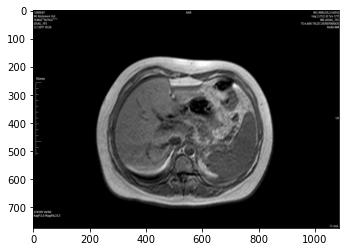

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("basedata/train/0/pacs (5).png").shape

(773, 1086, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('basedata/train/',
                                         target_size = (400,400),
                                         batch_size = 6, #number of samples 
                                         class_mode = 'binary')
validation_dataset = train.flow_from_directory('basedata/validation/',
                                         target_size = (400,400),
                                         batch_size = 6, #number of samples 
                                         class_mode = 'binary')

Found 138 images belonging to 4 classes.
Found 125 images belonging to 4 classes.


In [7]:
train_dataset.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [32]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape=(400,400,3)),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
        tf.keras.layers.MaxPool2D(2,2),
        #
        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
        tf.keras.layers.MaxPool2D(2,2),                     
        ##
        tf.keras.layers.Flatten(),
        ##
        tf.keras.layers.Dense(512,activation='relu'),
        ##
        tf.keras.layers.Dense(1,activation='sigmoid')
                                   
])

In [33]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [34]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 90, 
                     validation_data = validation_dataset)

Epoch 1/100
3/3 [==============================] - 6s 2s/step - loss: 5.3319 - accuracy: 0.2778 - val_loss: 7.7283 - val_accuracy: 0.3680
Epoch 2/100
3/3 [==============================] - 5s 2s/step - loss: 11.5618 - accuracy: 0.0000e+00 - val_loss: 4.5903 - val_accuracy: 0.5120
Epoch 3/100
3/3 [==============================] - 5s 2s/step - loss: -0.3091 - accuracy: 0.6111 - val_loss: 4.9546 - val_accuracy: 0.3680
Epoch 4/100
3/3 [==============================] - 5s 2s/step - loss: 4.0349 - accuracy: 0.3889 - val_loss: 2.6506 - val_accuracy: 0.3680
Epoch 5/100
3/3 [==============================] - 5s 2s/step - loss: -0.2842 - accuracy: 0.2222 - val_loss: 1.9299 - val_accuracy: 0.5040
Epoch 6/100
3/3 [==============================] - 5s 2s/step - loss: -9.9044 - accuracy: 0.3333 - val_loss: 30.3228 - val_accuracy: 0.3680
Epoch 7/100
3/3 [==============================] - 5s 2s/step - loss: 18.7860 - accuracy: 0.1111 - val_loss: 3.0812 - val_accuracy: 0.4720
Epoch 8/100
3/3 [=======

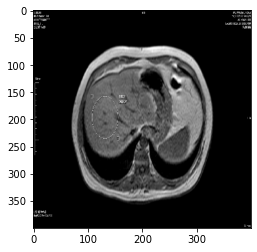

1


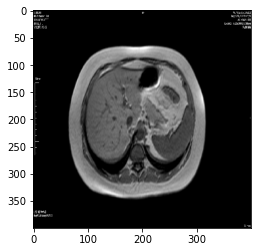

1


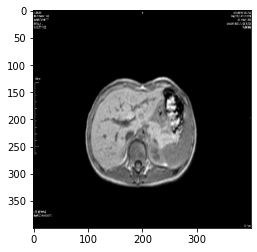

1


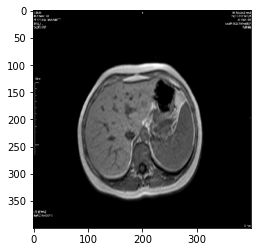

1


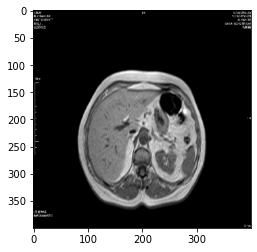

1


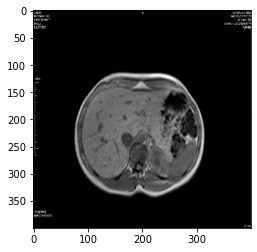

1


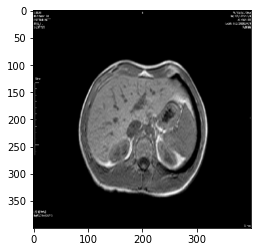

1


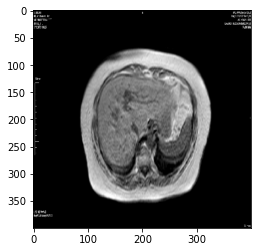

1


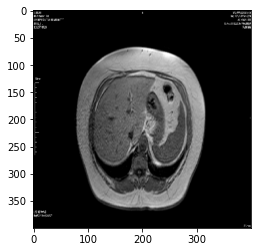

1


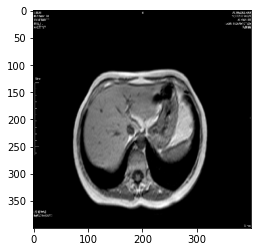

1


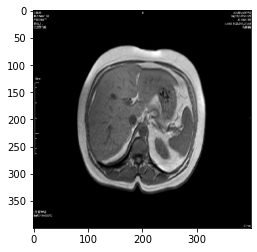

1


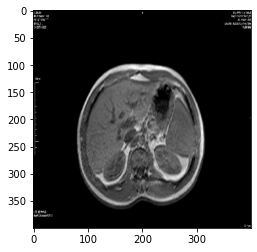

1


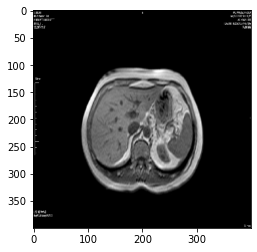

1


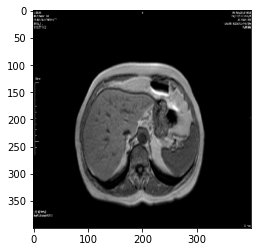

1


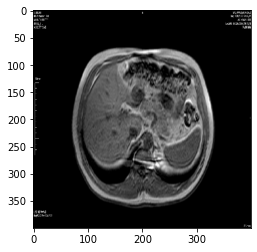

1


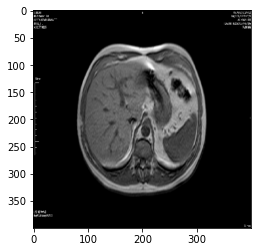

1


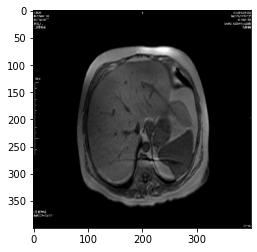

1


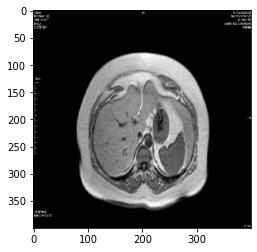

1


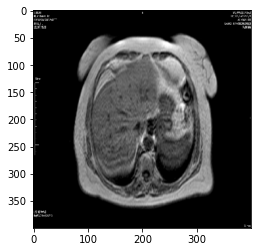

1


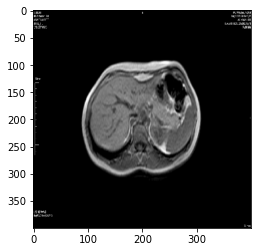

1


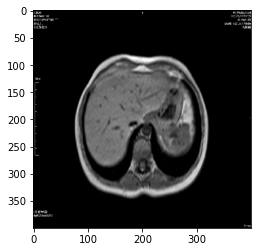

1


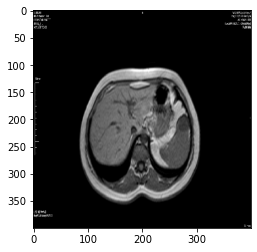

1


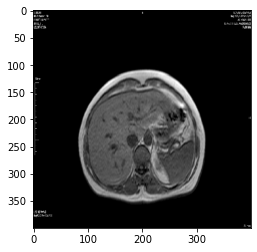

1


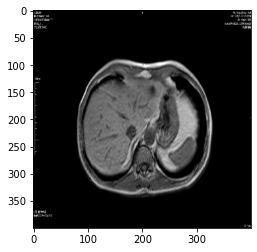

0


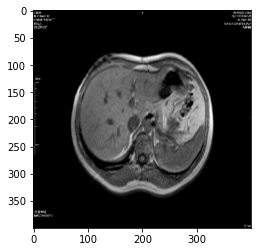

1


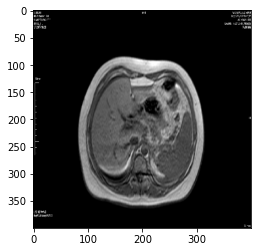

1


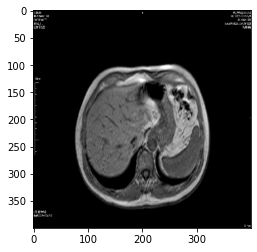

1


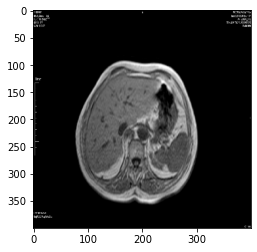

1


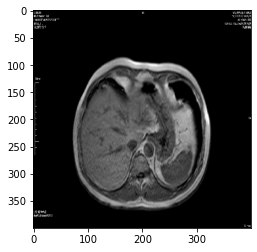

1


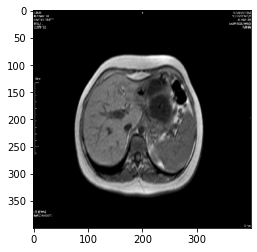

1


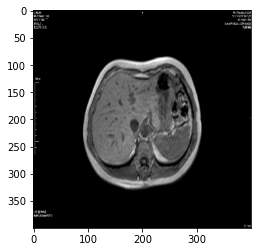

1


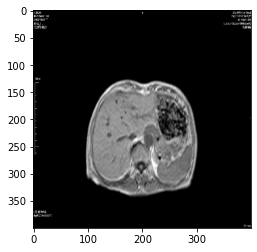

1


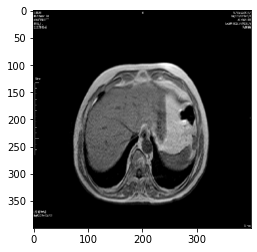

1


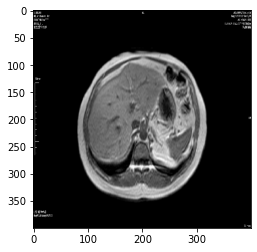

1


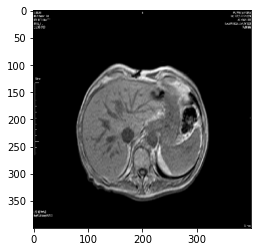

1


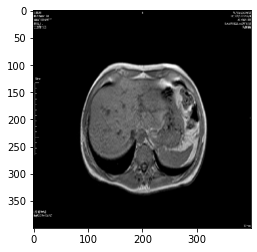

1


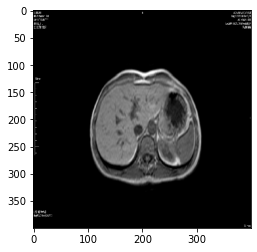

1


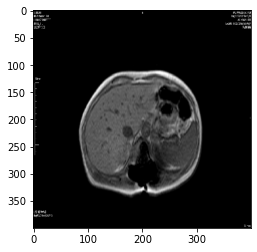

1


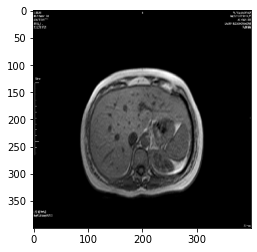

1


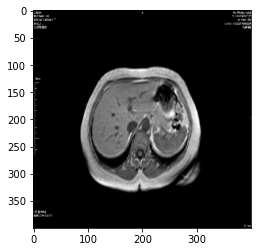

1


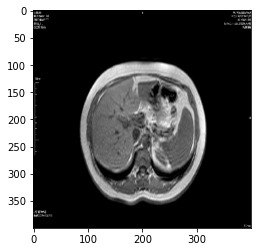

1


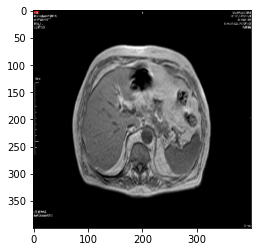

1


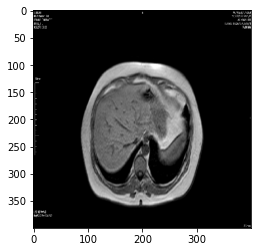

1


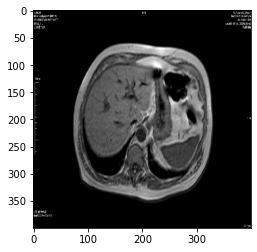

1


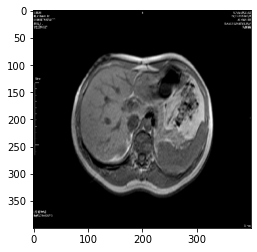

1


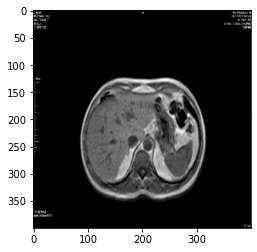

1


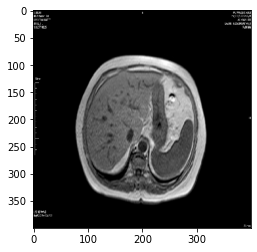

1


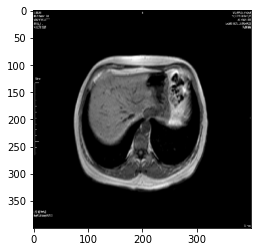

1


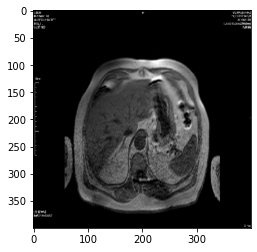

1


In [35]:
dir_path = 'basedata/test'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path + '//' + i, target_size=(400,400))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("0")
    elif val == 1:
        print("1")
    elif val == 2:
        print("2")
    else:
        print("3")
    